In [16]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

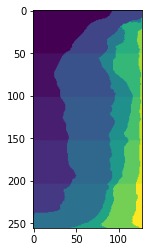

In [17]:
# split bigbrain subfields into 5 AP bins

labelmap = nib.load('../bigbrain/sub-bigbrain_hemi-R_label-hipp_desc-manualsubfields_dseg.nii.gz')

lbls = labelmap.get_fdata()
interval = np.linspace(0,lbls.shape[0],6)
for ap in range(4):
    lbls[int(interval[ap+1]):,:,:] = lbls[int(interval[ap+1]):,:,:] +5
    
# swap ap and pd labelnumbers
indswitch = np.reshape(range(25),[5,5])+1
indswitch = indswitch.T.flatten()
lbls2 = np.zeros(lbls.shape)
for i in range(25):
    lbls2[lbls==i+1] = indswitch[i]

# save as a nifti block
plt.imshow(lbls2[:,:,8])
labelmap = nib.Nifti1Image(lbls2, labelmap.affine, labelmap.header)
nib.save(labelmap,'sub-bigbrain_hemi-R_label-hipp_space-unfolded_dseg-DeKraker25.nii.gz')

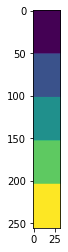

In [18]:
# make a dentate nifti block

labelmap = nib.load('/export03/data/BigBrain/hippunfold_v1.2.0_templateinject/work/sub-122017/coords/sub-122017_space-unfold_label-dentate_refcoords.nii.gz') # temporary solution since I didn't have an unfolded dentate nii handy
lbls = labelmap.get_fdata()[:,:,:,0,0]

interval = np.linspace(0,lbls.shape[0],6)
i=20
for ap in range(5):
    i=i+1
    lbls[int(interval[ap]):int(interval[ap+1]),:,:] = i
    
plt.imshow(lbls[:,:,8])
labelmap = nib.Nifti1Image(lbls, labelmap.affine, labelmap.header)
nib.save(labelmap,'sub-bigbrain_hemi-R_label-dentate_space-unfolded_dseg-DeKraker25.nii.gz')

In [19]:
# sample a label.gii file for each density

den = ['unfoldiso','0p5mm','1mm','2mm']

for i in range(len(den)):
    cmd1 = f'wb_command -volume-to-surface-mapping sub-bigbrain_hemi-R_label-hipp_space-unfolded_dseg-DeKraker25.nii.gz '\
        f'../unfold_template_hipp/tpl-avg_space-unfold_den-{den[i]}_midthickness.surf.gii '\
        f'sub-bigbrain_hemi-R_label-hipp_den-{den[i]}_DeKraker25.label.gii '\
        f'-enclosing'
    !{cmd1}
    cmd2 = f'wb_command -volume-to-surface-mapping sub-bigbrain_hemi-R_label-dentate_space-unfolded_dseg-DeKraker25.nii.gz '\
        f'../unfold_template_dentate/tpl-avg_space-unfold_den-{den[i]}_midthickness.surf.gii '\
        f'sub-bigbrain_hemi-R_label-dentate_den-{den[i]}_DeKraker25.label.gii '\
        f'-enclosing'
    !{cmd2}

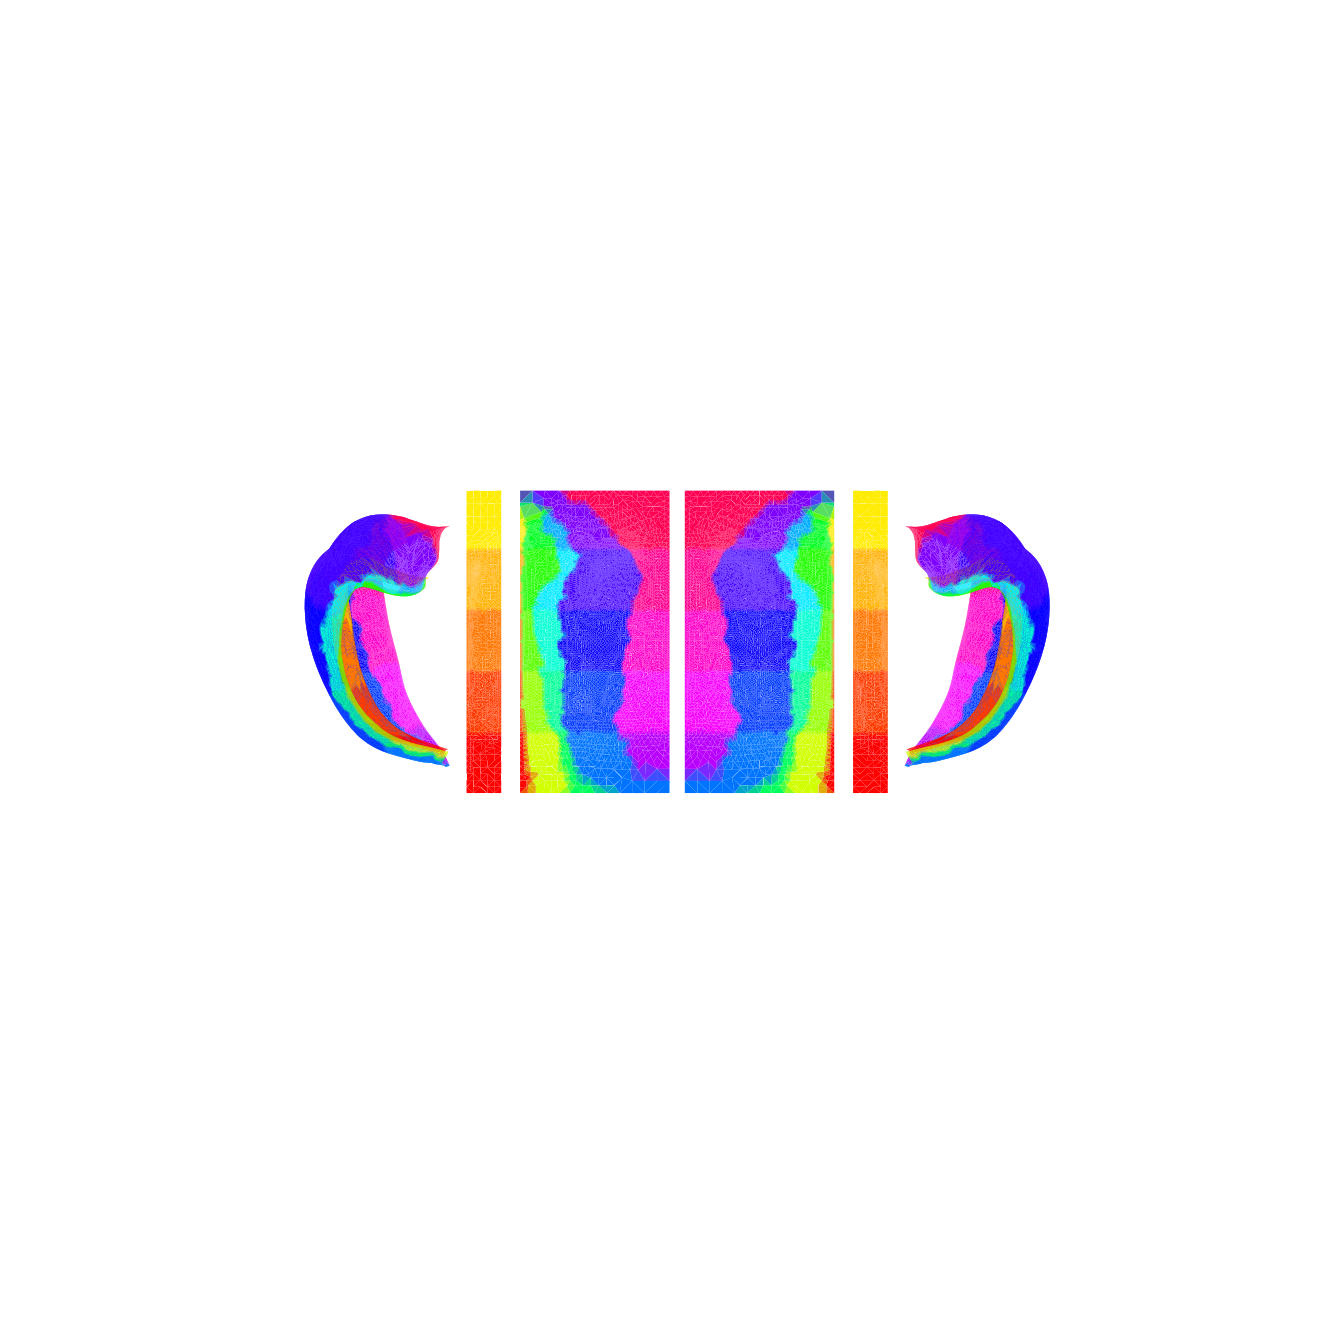

In [63]:
# view

import sys
sys.path.insert(1, '/export03/data/opt/hippunfold_toolbox/hippunfold_toolbox')
import plotting
import utils
from matplotlib import cm
import matplotlib as mpl

hipp_lbls = nib.load('sub-bigbrain_hemi-R_label-hipp_den-0p5mm_DeKraker25.label.gii').agg_data()
dg_lbls = nib.load('sub-bigbrain_hemi-R_label-dentate_den-0p5mm_DeKraker25.label.gii').agg_data()

cmap = cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=25), cmap=plt.get_cmap('hsv'))
cmap = cmap.to_rgba(range(25))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24,24), subplot_kw={'projection': "3d"})
plotting.surfplot_canonical_foldunfold(ax, -np.concatenate((hipp_lbls,dg_lbls,hipp_lbls,dg_lbls)), den='0p5mm', cmap=cmap)
ax.set_box_aspect([ub - lb for lb, ub in (getattr(ax, f'get_{a}lim')() for a in 'xyz')])

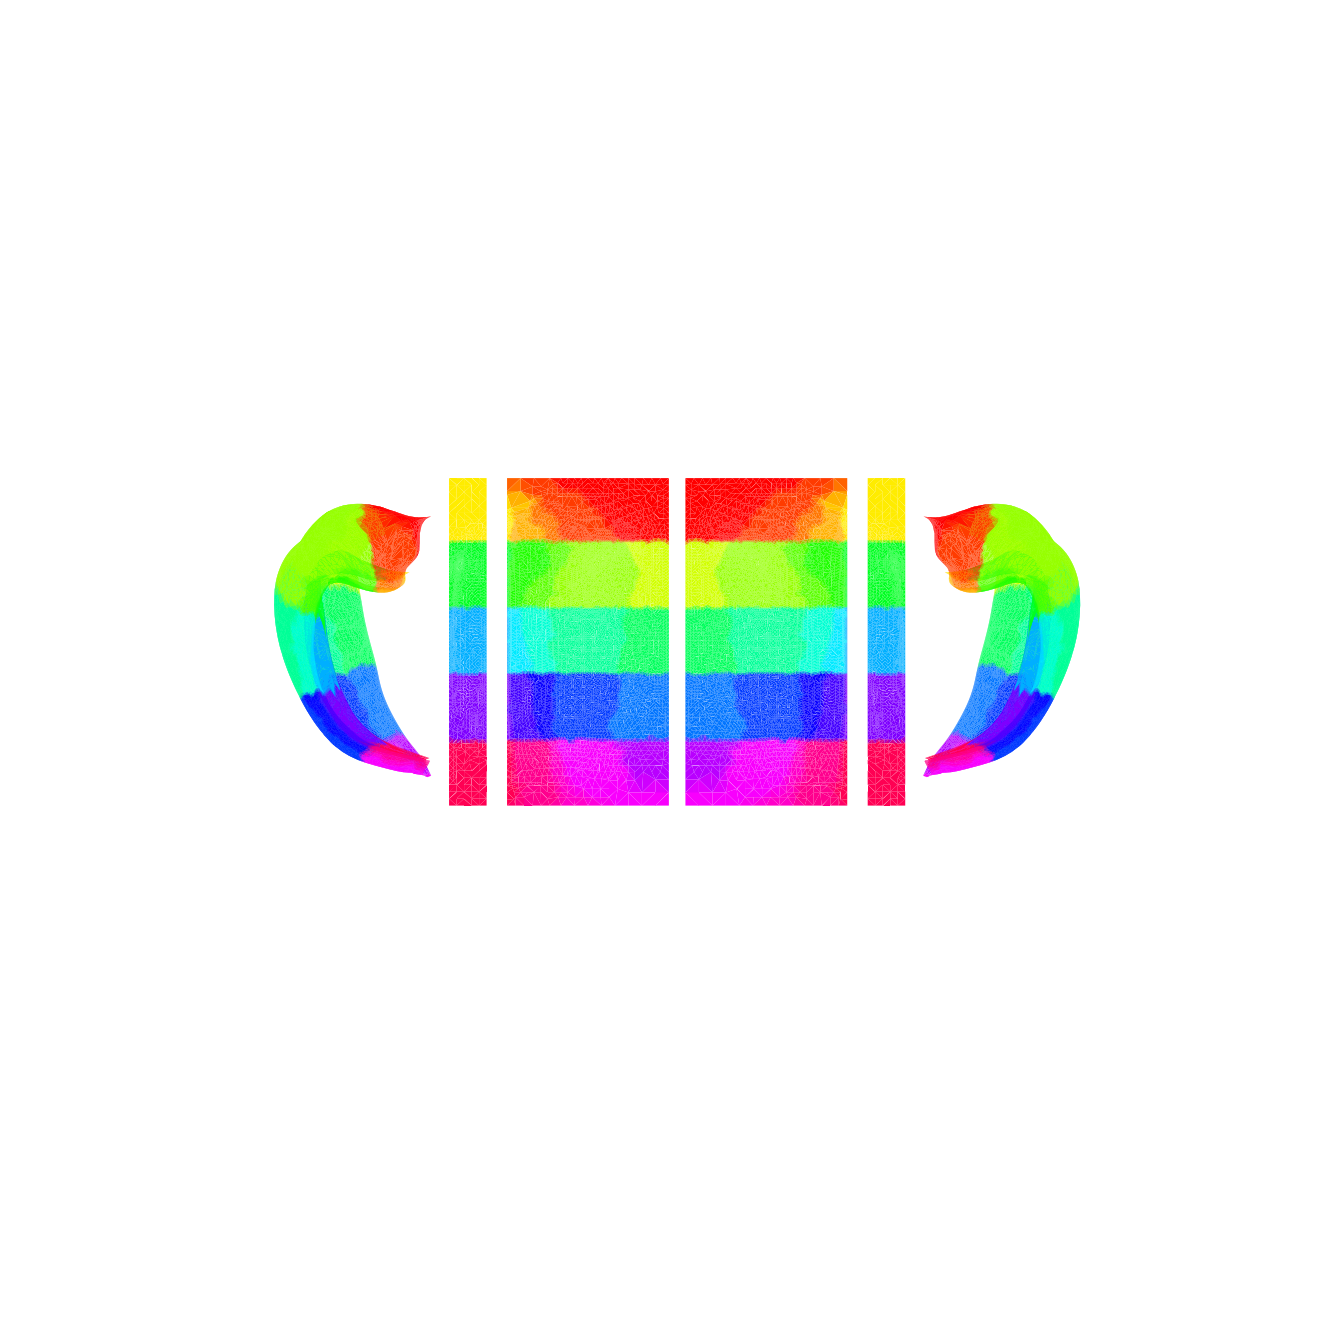

In [23]:
# swap ap and pd labelnumbers
indswitch = np.reshape(range(25),[5,5])+1
indswitch = indswitch.T.flatten()
hipp_lbls2 = np.zeros(hipp_lbls.shape)
for i in range(25):
    hipp_lbls2[hipp_lbls==i+1] = indswitch[i]
dg_lbls2 = (dg_lbls-20)*5    
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24,24), subplot_kw={'projection': "3d"})
p = plotting.surfplot_canonical_foldunfold(ax, np.concatenate((hipp_lbls2,dg_lbls2,hipp_lbls2,dg_lbls2)), den='0p5mm', cmap=cmap)